# Training supermarket_sales.csv

1. Apply the necessary data preprocessing using ```scikit-learn``` pipelines. Justify all choices. The only requirements regarding attribute encoding are:

    2. Encode the attribute ```Time``` into 4 categories: Morning (10:00 - 11:59), Afternoon (12:00 - 17:00), Evening (17:01 - 19:00) and Night (19:01 - 21:00).

Load dataset

In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

sales = pd.read_csv('supermarket_sales.csv');
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Pre-process data

In [575]:
# check for null items
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

Since the inputs for training the prediction for gross income are unit price, quantity, day, time slot, and product line, the other attributes could be dropped.

In [576]:
sales = sales.drop(['Invoice ID', 'Branch', 'City', 'Customer type',
           'Gender', 'Total', 'Payment', 'cogs', 
           'gross margin percentage', 'Rating'], axis=1);
sales

,Product line,Unit price,Quantity,Date,Time,gross income
0,Health and beauty,74.69,7,1/5/2019,13:08,26.1415
1,Electronic accessories,15.28,5,3/8/2019,10:29,3.8200
2,Home and lifestyle,46.33,7,3/3/2019,13:23,16.2155
3,Health and beauty,58.22,8,1/27/2019,20:33,23.2880
4,Sports and travel,86.31,7,2/8/2019,10:37,30.2085
...,...,...,...,...,...,...
995,Health and beauty,40.35,1,1/29/2019,13:46,2.0175
996,Home and lifestyle,97.38,10,3/2/2019,17:16,48.6900
997,Food and beverages,31.84,1,2/9/2019,13:22,1.5920
998,Home and lifestyle,65.82,1,2/22/2019,15:33,3.2910


1. Encode the attribute ```Date``` with the respective day of the week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday).

In [577]:
from pandas import DatetimeIndex as dt
sales['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

Map numbers to day of the week 
(0=Monday, 1=Tuesday, 2=Wednesday, 3=Thursday,
4=Friday, 5=Saturday, 6=Sunday)

In [578]:
day_of_week = pd.to_datetime(sales['Date']).dt.dayofweek
day_of_week

0      5
1      4
2      6
3      6
4      4
      ..
995    1
996    5
997    5
998    4
999    0
Name: Date, Length: 1000, dtype: int64

In [579]:
# Use integer encoding to replace date with day of week
sales = sales.drop('Date', axis =1)
sales['Day of Week'] = day_of_week;
sales

,Product line,Unit price,Quantity,Time,gross income,Day of Week
0,Health and beauty,74.69,7,13:08,26.1415,5
1,Electronic accessories,15.28,5,10:29,3.8200,4
2,Home and lifestyle,46.33,7,13:23,16.2155,6
3,Health and beauty,58.22,8,20:33,23.2880,6
4,Sports and travel,86.31,7,10:37,30.2085,4
...,...,...,...,...,...,...
995,Health and beauty,40.35,1,13:46,2.0175,1
996,Home and lifestyle,97.38,10,17:16,48.6900,5
997,Food and beverages,31.84,1,13:22,1.5920,5
998,Home and lifestyle,65.82,1,15:33,3.2910,4


2. Encode the attribute ```Time``` into 4 categories: Morning (10:00 - 11:59), Afternoon (12:00 - 17:00), Evening (17:01 - 19:00) and Night (19:01 - 21:00).

In [580]:
pd.to_datetime(sales['Time']).dt.strftime('%H').astype('float')

0      13.0
1      10.0
2      13.0
3      20.0
4      10.0
       ... 
995    13.0
996    17.0
997    13.0
998    15.0
999    13.0
Name: Time, Length: 1000, dtype: float64

Map time of day into categories
1 = Morning (10:00 - 11:59), 2 = Afternoon (12:00 - 16:59),
3 = Evening (17:00 - 18:59), 4 = Night (19:00 - 20:59)

In [581]:
hour = pd.to_datetime(sales['Time']).dt.strftime('%H').astype('float')
hour_cat = pd.cut(hour, bins=[0., 12.0, 16.0, 18.0, np.inf], labels=[1, 2, 3, 4])
hour_cat

0      2
1      1
2      2
3      4
4      1
      ..
995    2
996    3
997    2
998    2
999    2
Name: Time, Length: 1000, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [582]:
# Use integer encoding to replace time with time of day
sales = sales.drop('Time', axis =1)
sales['Time'] = hour_cat.astype(int);
sales

,Product line,Unit price,Quantity,gross income,Day of Week,Time
0,Health and beauty,74.69,7,26.1415,5,2
1,Electronic accessories,15.28,5,3.8200,4,1
2,Home and lifestyle,46.33,7,16.2155,6,2
3,Health and beauty,58.22,8,23.2880,6,4
4,Sports and travel,86.31,7,30.2085,4,1
...,...,...,...,...,...,...
995,Health and beauty,40.35,1,2.0175,1,2
996,Home and lifestyle,97.38,10,48.6900,5,3
997,Food and beverages,31.84,1,1.5920,5,2
998,Home and lifestyle,65.82,1,3.2910,4,2


Plot histogram of numerical attributes to determine which
feature scaling method to use.

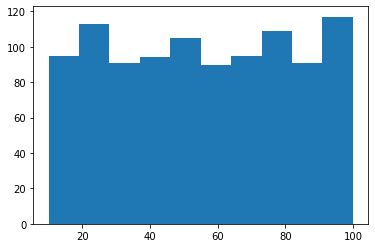

In [583]:
plt.hist(sales['Unit price']);

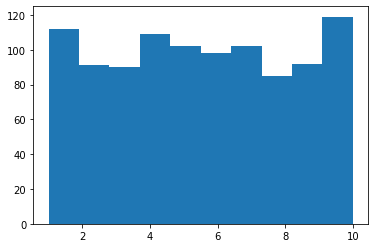

In [584]:
plt.hist(sales['Quantity']);

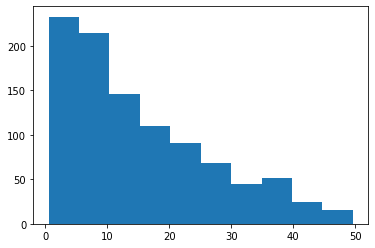

In [585]:
plt.hist(sales['gross income']);

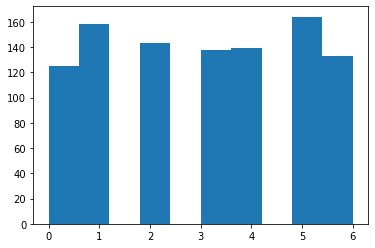

In [586]:
plt.hist(sales['Day of Week']);

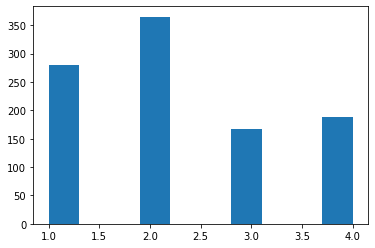

In [587]:
plt.hist(sales['Time']);

Since the data isnt Gaussian and there are minimal outliers
MinMax Scaling would be the most suited method for the
numerical attributes

### Model 1 (Predict Gross Income)  preprocessed data

In [588]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
# Find most predictive attibute for gross income
sales.corr(method='pearson')['gross income'].sort_values(ascending=False)

gross income    1.000000
Quantity        0.705510
Unit price      0.633962
Day of Week     0.038809
Time            0.011517
Name: gross income, dtype: float64

Since quantity is the most predictive attibute, stratify Quantity.

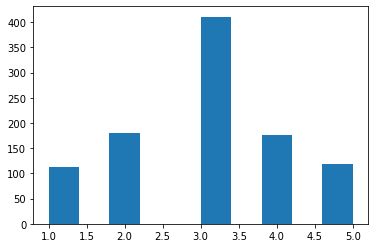

In [589]:
# Stratify Quantity 
quantity_cat = pd.cut(sales['Quantity'],
                     bins=[0.,1.5,3.5,7.0,9.0,np.inf],
                     labels=[1,2,3,4,5])
plt.hist(quantity_cat);

In [590]:
# Partition data into training and test using a 80/20 partition
train_set_M1, test_set_M1, q_cat_train, q_cat_test = train_test_split(sales, quantity_cat,
                                                                  test_size=0.2,
                                                                  stratify=quantity_cat,
                                                                  random_state=42,
                                                                 shuffle=True)

Prepare data for ML algorithms

In [667]:
t_train_M1 = train_set_M1['gross income'].copy()
X_train_M1 = train_set_M1.drop(labels='gross income', axis=1)
t_test_M1 = test_set_M1['gross income'].copy()
X_test_M1 = test_set_M1.drop(labels='gross income', axis=1)

# Export test sets 
import joblib

joblib.dump(X_test_M1, 'X_test_M1.pkl')
joblib.dump(t_test_M1, 't_test_M1.pkl')

['t_test_M1.pkl']

Apply OneHotEncoder for categorical attributes 
(Product line, day of week, Time) and MinMax scaler for
the numerical attributes 

In [592]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer


cat_attribs_M1 = ['Product line', 'Day of Week', 'Time']
num_attribs_M1 = ['Unit price', 'Quantity']

# Pipeline for the categorical attributes
cat_pipeline = Pipeline([('one_hot', OneHotEncoder())])

# Pipeline for numerical attributes
num_pipeline = Pipeline([('scaler', MinMaxScaler())])

# preprocessed pipeline for gross income prediction
pre_process_pipe_m1 = ColumnTransformer([('num', num_pipeline, num_attribs_M1),
                                     ('cat', cat_pipeline, cat_attribs_M1)])

### Model 2 (Predict Unit Price)  preprocessed data

In [593]:
# Find most predictive attribute for Unit price
sales.corr(method='pearson')['Unit price'].sort_values(ascending=False)

Unit price      1.000000
gross income    0.633962
Time            0.016391
Quantity        0.010778
Day of Week    -0.007040
Name: Unit price, dtype: float64

The most predictive attribute for Unit price is gross income 

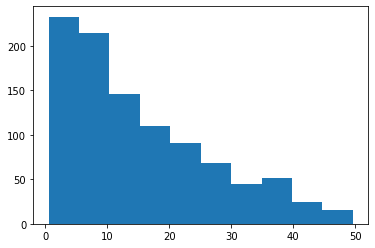

In [594]:
plt.hist(sales['gross income']);

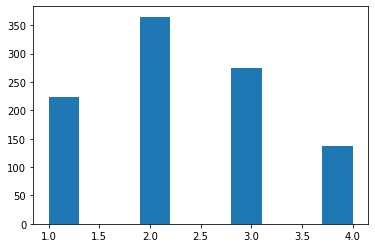

In [595]:
# Stratify gross income
gi_cat = pd.cut(sales['gross income'],
                     bins=[0.,5., 15.,30.,np.inf],
                     labels=[1,2,3,4])
plt.hist(gi_cat);

In [596]:
# Partition data into training and test using a 80/20 partition
train_set_M2, test_set_M2, g_cat_train, g_cat_test = train_test_split(sales, gi_cat,
                                                                  test_size=0.2,
                                                                  stratify=gi_cat,
                                                                  random_state=42,
                                                                 shuffle=True)

Prepare data for ML algorithms

In [665]:
t_train_M2 = train_set_M2['Unit price'].copy()
X_train_M2 = train_set_M2.drop(labels='Unit price', axis=1)
t_test_M2 = test_set_M2['Unit price'].copy()
X_test_M2 = test_set_M2.drop(labels='Unit price', axis=1)

# Export test sets 

joblib.dump(X_test_M2, 'X_test_M2.pkl')
joblib.dump(t_test_M2, 't_test_M2.pkl')

['t_test_M2.pkl']

In [598]:
cat_attribs_M2 = ['Product line', 'Day of Week', 'Time']
num_attribs_M2 = ['gross income', 'Quantity']

# Pipeline for the categorical attributes
cat_pipeline = Pipeline([('one_hot', OneHotEncoder())])

# Pipeline for numerical attributes
num_pipeline = Pipeline([('scaler', MinMaxScaler())])

# preprocessed pipeline for unit price prediction
pre_process_pipe_m2 = ColumnTransformer([('num', num_pipeline, num_attribs_M2),
                                     ('cat', cat_pipeline, cat_attribs_M2)])

### Model 3 (Predict Day of Purchase)  preprocessed data

In [599]:
# Find most predictive attibute for day of week 
sales.corr(method='pearson')['Day of Week'].sort_values(ascending=False)

Day of Week     1.000000
Quantity        0.054770
gross income    0.038809
Time            0.028895
Unit price     -0.007040
Name: Day of Week, dtype: float64

Since quantity is the most predictive attribute, statify quantity

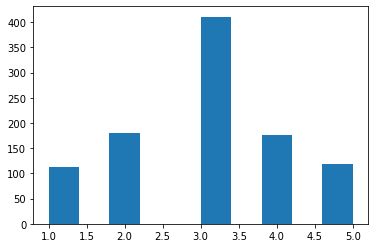

In [600]:
# Stratify 
quantity_cat2 = pd.cut(sales['Quantity'],
                     bins=[0.,1.5,3.5,7.0,9.0,np.inf],
                     labels=[1,2,3,4,5])
plt.hist(quantity_cat2);

In [601]:
# Partition data into training and test using a 80/20 partition
train_set_M3, test_set_M3, quan_cat_train, quan_cat_test = train_test_split(sales, quantity_cat2,
                                                                  test_size=0.2,
                                                                  stratify=quantity_cat2,
                                                                  random_state=42,
                                                                 shuffle=True)

Prepare data for ML algorithms

In [666]:
t_train_M3 = train_set_M3['Day of Week'].copy()
X_train_M3 = train_set_M3.drop(labels='Day of Week', axis=1)
t_test_M3 = test_set_M3['Day of Week'].copy()
X_test_M3 = test_set_M3.drop(labels='Day of Week', axis=1)

# Export test sets
joblib.dump(X_test_M3, 'X_test_M3.pkl')
joblib.dump(t_test_M3, 't_test_M3.pkl')

['t_test_M3.pkl']

Apply OneHotEncoder for categorical attributes (Product line, Time) and MinMax scaler for the numerical attributes

In [603]:
cat_attribs_M3 = ['Product line', 'Time']
num_attribs_M3 = ['Unit price', 'Quantity', 'gross income']

# Pipeline for the categorical attributes
cat_pipeline = Pipeline([('one_hot', OneHotEncoder())])

# Pipeline for numerical attributes
num_pipeline = Pipeline([('scaler', MinMaxScaler())])

# preprocessed pipeline for day of week prediction
pre_process_pipe_m3 = ColumnTransformer([('num', num_pipeline, num_attribs_M3),
                                     ('cat', cat_pipeline, cat_attribs_M3)])

For what follows, use the coefficient of determination, $r^2$, as one of your metrics of success and report its 95% confidence interval. Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

2. Train a multiple linear regression with and without Lasso regularization to **predict ```gross income```**.

    1. How is the gross income affected by unit price, quantity, and other variables like day, time slot, and product line in general?
    
    4. When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Which features were excluded in this model, if any?

## Multiple linear regression with Lasso regularization to predict gross income (Model 1)

Carry hyperparameter tuning

In [615]:
from sklearn.linear_model import Lasso

# Final pipeline for model 1 using preprocessed data
model_pipe1 = Pipeline([('preprocess', pre_process_pipe_m1),
                          ('lasso_reg', Lasso())])
# Parameter grid for linear regression
param_grid_m1 = {'lasso_reg__alpha': np.linspace(0.001, 0.1, 1000)}

grid_search_model_1 = GridSearchCV(model_pipe1, 
                                   param_grid=param_grid_m1,
                                   cv=2,
                                   refit=True)
grid_search_model_1.fit(X_train_M1, t_train_M1)
grid_search_model_1.best_params_

{'lasso_reg__alpha': 0.07581981981981982}

Save the final model for multiple linear regression with lasso regularization
that is used to predict gross income

In [657]:
import joblib
model_1_lasso = grid_search_model_1.best_estimator_


joblib.dump(model_1_lasso, 'pipeline_problem2_lasso.pkl')

['pipeline_problem2_lasso.pkl']

In [617]:
from sklearn.metrics import r2_score

# find coefficient of determination
r2_score(t_train_M1, model_1_lasso.predict(X_train_M1))

0.8924590563967238

In [618]:
from sklearn.model_selection import cross_val_score

# To compute 95% CI
scores_1 = cross_val_score(model_1_lasso, X_train_M1, t_train_M1,
                        cv=10,
                        scoring='r2')

scores_1

array([0.90784531, 0.88113536, 0.90401883, 0.85987938, 0.89568321,
       0.85916892, 0.90677405, 0.8926232 , 0.88169991, 0.90016989])

In [619]:
from scipy import stats
# confidence interval for scores
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, len(scores_1) - 1,
                 loc=scores_1.mean(),
                 scale=scores_1.std(ddof=1)/np.sqrt(len(scores_1))))

95% CI:  (0.8759878067536555, 0.9018118038411966)


## Multiple linear regression without Lasso regularization to predict gross income (Model 1)

In [620]:
from sklearn.linear_model import LinearRegression

# Final pipeline for model 1 using preprocessed data
model_pipe1_noLasso = Pipeline([('preprocess', pre_process_pipe_m1),
                          ('lin_reg', LinearRegression())])

# Parameter grid for linear regression
param_grid_m1_nl = {'lin_reg__fit_intercept': [True, False]}

grid_search_model_n1 = GridSearchCV(model_pipe1_noLasso, 
                                    param_grid=param_grid_m1_nl,
                                   cv=2,
                                   refit=True)

grid_search_model_n1.fit(X_train_M1, t_train_M1)
grid_search_model_n1.best_params_

{'lin_reg__fit_intercept': False}

Save the final model for multiple linear regression without lasso regularization that is used to predict gross income

In [658]:
model_1_noLasso = grid_search_model_n1.best_estimator_

joblib.dump(model_1_noLasso, 'pipeline_problem2_noLasso.pkl')

['pipeline_problem2_noLasso.pkl']

In [622]:
# find coefficient of determination
r2_score(t_train_M1, model_1_noLasso.predict(X_train_M1))

0.8945457424192502

In [623]:
# To compute 95% CI
scores_n1 = cross_val_score(model_1_noLasso, X_train_M1, t_train_M1,
                        cv=10,
                        scoring='r2')

scores_n1

array([0.90678818, 0.88283876, 0.89959424, 0.85500263, 0.88835694,
       0.85156337, 0.90678588, 0.89630531, 0.88211585, 0.9023688 ])

In [624]:
# confidence interval for scores
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, len(scores_n1) - 1,
                 loc=scores_n1.mean(),
                 scale=scores_n1.std(ddof=1)/np.sqrt(len(scores_n1))))

95% CI:  (0.8728911921611149, 0.901452800385383)


3. Train a multiple linear regression with and without Lasso regularization to **predict ```Unit price```**.

    1. How is the unit price affected by gross income, quantity, and other variables like day, timeslot, and product line in general?
    
    4. When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Which features were excluded in this model, if any?

## Multiple linear regression with Lasso regularization to predict Unit price (Model 2)

In [636]:
# Final pipeline for model 2 using preprocessed data
model_pipe2 = Pipeline([('preprocess', pre_process_pipe_m2),
                          ('lasso_reg', Lasso())])
# Parameter grid for linear regression
param_grid_m2 = {'lasso_reg__alpha': np.linspace(0.001, 0.1, 1000)}

grid_search_model_2 = GridSearchCV(model_pipe2, 
                                   param_grid=param_grid_m2,
                                   cv=2,
                                   refit=True)
grid_search_model_2.fit(X_train_M2, t_train_M2)
grid_search_model_2.best_params_

{'lasso_reg__alpha': 0.1}

Save the final model for multiple linear regression with lasso regularization that is used to predict Unit price

In [659]:
model2_lasso = grid_search_model_2.best_estimator_

joblib.dump(model2_lasso, 'pipeline_problem3_lasso.pkl')

['pipeline_problem3_lasso.pkl']

In [638]:
# find coefficient of determination
r2_score(t_train_M2, model2_lasso.predict(X_train_M2))

0.779884530114984

In [639]:
# To compute 95% CI
scores_l_2 = cross_val_score(model2_lasso, X_train_M2, t_train_M2,
                        cv=10,
                        scoring='r2')

scores_l_2

array([0.81909082, 0.8259114 , 0.73246087, 0.74250409, 0.82884725,
       0.74477846, 0.76918821, 0.6931288 , 0.77955455, 0.78462786])

In [640]:
# confidence interval for scores
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, len(scores_l_2) - 1,
                 loc=scores_l_2.mean(),
                 scale=scores_l_2.std(ddof=1)/np.sqrt(len(scores_l_2))))

95% CI:  (0.7400396657899634, 0.8039787947854989)


## Multiple linear regression without Lasso regularization to predict Unit price (Model 2)

In [641]:
# Final pipeline for model 1 using preprocessed data
model_pipe2_noLasso = Pipeline([('preprocess', pre_process_pipe_m2),
                          ('lin_reg', LinearRegression())])

# Parameter grid for linear regression
param_grid_m2_nl = {'lin_reg__fit_intercept': [True, False]}

grid_search_model_n2 = GridSearchCV(model_pipe2_noLasso, 
                                    param_grid=param_grid_m2_nl,
                                   cv=2,
                                   refit=True)

grid_search_model_n2.fit(X_train_M2, t_train_M2)
grid_search_model_n2.best_params_

{'lin_reg__fit_intercept': False}

Save the final model for multiple linear regression without lasso regularization that is used to predict Unit price

In [660]:
model2_nlasso = grid_search_model_n2.best_estimator_

joblib.dump(model2_nlasso, 'pipeline_problem3_noLasso.pkl')

['pipeline_problem3_noLasso.pkl']

In [644]:
# find coefficient of determination
r2_score(t_train_M2, model2_nlasso.predict(X_train_M2))

0.7824751239044847

In [645]:
# To compute 95% CI
scores_nl_2 = cross_val_score(model2_nlasso, X_train_M2, t_train_M2,
                        cv=10,
                        scoring='r2')

scores_nl_2

array([0.81679077, 0.82078863, 0.72853813, 0.73757509, 0.82777201,
       0.74233286, 0.76941599, 0.69863952, 0.78145298, 0.78238472])

In [646]:
# confidence interval for scores
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, len(scores_nl_2) - 1,
                 loc=scores_nl_2.mean(),
                 scale=scores_nl_2.std(ddof=1)/np.sqrt(len(scores_nl_2))))

95% CI:  (0.739463726099451, 0.8016744132168245)


For what follows, use accuracy as one of your metrics of success and report its 95% confidence interval. Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

6. Train a classifier to **predict the day of purchase** (Monday, Tuesday, etc.).

    1. Select at least 2 classifiers.

## Decision tree classifier to predict Day of Purchase (Model 3)

In [648]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Final Pipeline
model3_pipe_dt= Pipeline([('preprocess', pre_process_pipe_m3),
                          ('DT', DecisionTreeClassifier(random_state=0))])

# Parameter grid for decision tree
param_grid_dt = {'DT__criterion': ['gini', 'entropy'],
             'DT__max_depth': np.arange(1,15),
             'DT__min_samples_split': np.arange(2,8),
             'DT__min_samples_leaf':np.arange(1,5)}

grid_search_dt = GridSearchCV(model3_pipe_dt, param_grid_dt, 
                           cv=5, scoring='accuracy', refit=True)

grid_search_dt.fit(X_train_M3, t_train_M3)
grid_search_dt.best_params_

{'DT__criterion': 'entropy',
 'DT__max_depth': 9,
 'DT__min_samples_leaf': 4,
 'DT__min_samples_split': 2}

Save the final model for Decision tree classifier to predict day of purchase

In [661]:
final_model_3_dt = grid_search_dt.best_estimator_

joblib.dump(final_model_3_dt, 'pipeline_problem6_DT.pkl')

['pipeline_problem6_DT.pkl']

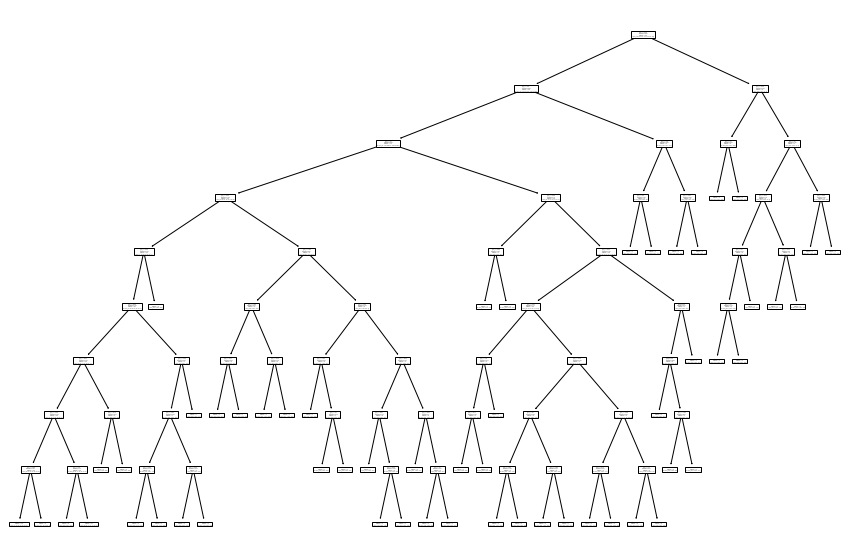

In [650]:
plt.figure(figsize=(15,10))
plot_tree(final_model_3_dt.named_steps['DT']);

In [651]:
# Get the accuracy score 
from sklearn.metrics import accuracy_score

accuracy_score(t_train_M3, final_model_3_dt.predict(X_train_M3))

0.3025

In [653]:
from sklearn.model_selection import cross_val_score

# To compute 95% CI

scores = cross_val_score(final_model_3_dt, X_train_M3, t_train_M3,
                        cv=10,
                        scoring='accuracy')

scores

array([0.1875, 0.1625, 0.1625, 0.2   , 0.1625, 0.1375, 0.125 , 0.125 ,
       0.1125, 0.15  ])

In [654]:
from scipy import stats

confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

95% CI:  (0.13237230912918443, 0.17262769087081561)


### Random Forest classifier to predict Day of Purchase (Model 3)

In [562]:
from sklearn.ensemble import RandomForestClassifier

# Model Pipeline
model_3_rf = Pipeline([('preprocess', pre_process_pipe_m3),
                          ('RF', RandomForestClassifier(random_state=0))])

# Parameter grid for decision tree
param_grid_rf = {'RF__n_estimators': [50,100,200,300,400],
              'RF__criterion': ['gini', 'entropy'],
              'RF__max_depth': np.arange(1,10),
              'RF__min_samples_split': np.arange(2,5),
              'RF__min_samples_leaf':np.arange(1,5)}

grid_search_rf = GridSearchCV(model_3_rf, param_grid_rf, 
                           cv=5, scoring='accuracy', refit=True)

grid_search_rf.fit(X_train_M3, t_train_M3)
grid_search_rf.best_params_

{'RF__criterion': 'gini',
 'RF__max_depth': 9,
 'RF__min_samples_leaf': 1,
 'RF__min_samples_split': 3,
 'RF__n_estimators': 50}

Save the final model for Random Forest Classifier to predict day of purchase

In [662]:
final_model_3_rf = grid_search_rf.best_estimator_

joblib.dump(final_model_3_rf, 'pipeline_problem6_rf.pkl')

['pipeline_problem6_rf.pkl']

In [564]:
# Get the accuracy score 
accuracy_score(t_train_M3, final_model_3_rf.predict(X_train_M3))

0.86125

In [565]:
# To compute 95% CI
scores2 = cross_val_score(final_model_3_rf, X_train_M3, t_train_M3,
                        cv=10,
                        scoring='accuracy')

scores2

array([0.175 , 0.075 , 0.1625, 0.15  , 0.1625, 0.1   , 0.25  , 0.125 ,
       0.1625, 0.175 ])

In [566]:
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

95% CI:  (0.13237230912918443, 0.17262769087081561)
